In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import glob
import os
from tqdm.auto import tqdm

In [68]:
IMG_PATH = "Data\\12_Icons"
VER=3; 

AUTOENCODER_PATH = "ImageSimilarity"
MODEL_PATH = f"{AUTOENCODER_PATH}/autoencoder{VER}.h5"
FEATURES_PATH = f"{AUTOENCODER_PATH}/features{VER}.pickle"
FREQ_PATH = f"{AUTOENCODER_PATH}/frequencies{VER}.pickle"
SIM_IMG_PATH = f"{AUTOENCODER_PATH}//similar_images{VER}.pickle"

PIC1_PATH = f"{AUTOENCODER_PATH}/recon_vis{VER}.png"
PIC2_PATH = f"{AUTOENCODER_PATH}/plot{VER}.png"


In [70]:
# load frequencies of different proximity values that was found between all pairs of images
proximity_freq = pickle.loads(open(FREQ_PATH, "rb").read())

In [39]:
import pandas as pd
dp = pd.DataFrame.from_dict(dict(proximity_freq), orient='index', columns=['freq'])

Text(0, 0.5, 'Count (log10)')

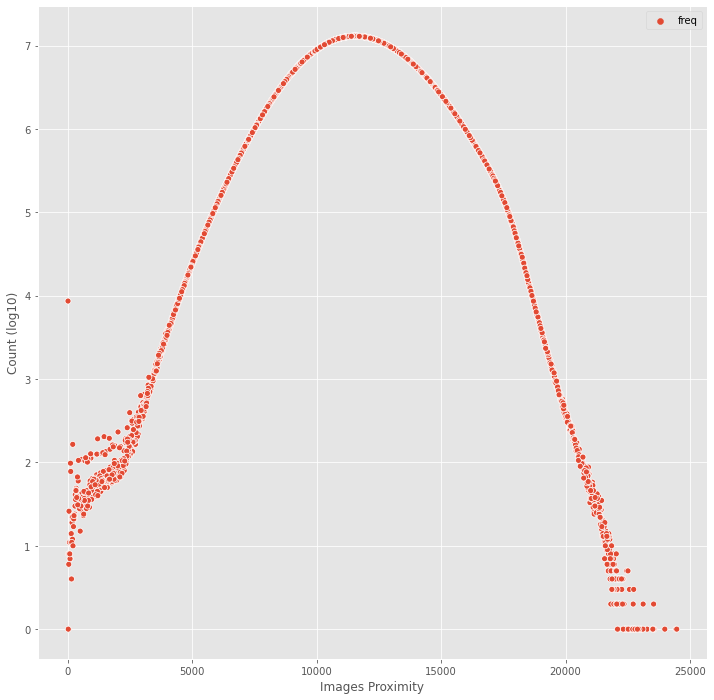

In [60]:
# Let's visualize it 
import seaborn as sns
from pylab import rcParams

rcParams['figure.figsize'] = 12,12
plt.style.use('ggplot')

g = sns.scatterplot(data=np.log10(dp))
g.set_xlabel("Images Proximity")
g.set_ylabel("Count (log10)")

In [61]:
# We see that close proximity group is most likely within a 3000 proximity value.
# Let's limit the scope and find app features from the close proximity group

In [67]:
SIM_IMG_PATH

'ImageSimilarity/similar_images3.pickle'

In [71]:
# load image features index from disk
similar_images = pickle.loads(open(SIM_IMG_PATH, "rb").read())
#similar_images = pickle.loads(open(SIM_IMG_PATH, "rb").read())

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [64]:
# loop over the testing indexes
maxResults = 10
f = features_idx["features"]
results = {}
for k in tqdm(range(len(f))):
    # Find all similar images
    indices = []
    for i in range(len(f)):
        d = np.linalg.norm(f[k] - f[i])
        if d<3000 and d>0: 
            indices.append(i)
    results[k] = indices
            

KeyboardInterrupt: 